In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.visualization.Dendrogram import Dendrogram
from interClusLib.evaluation.SilhouetteScore import *
from interClusLib.clustering.IntervalAgglomerativeClustering import IntervalAgglomerativeClustering
from interClusLib.clustering.IntervalSOM import IntervalSOM
from interClusLib.clustering.IntervalFuzzyCMeans import IntervalFuzzyCMeans
from interClusLib.metric import *

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0          2.028515        19.338979        26.903916        84.050313   
1         35.299451        39.360866        46.288577        84.392543   
2         24.384389        37.908649         4.404539        16.450498   
3         32.426270        58.511395        12.394325        45.122830   
4         38.567000        88.326719        58.186393        83.519240   
5         61.027318        95.277387         3.616713        46.911282   
6          6.732767        12.238372        10.767827        27.886049   
7         10.733517        72.752572        23.735834        54.199290   
8         25.857539        67.678863        59.950195        64.818405   
9         26.150034        97.303416        16.935826        93.264721   
10        42.773246        47.528347        72.261549        89.146

In [2]:
model = IntervalAgglomerativeClustering(n_clusters=4, linkage='complete')

model.fit(random_data.get_intervals())

print(model.get_labels())

print(silhouette_score(random_data.get_intervals(),model.get_labels(),metric='euclidean'))

[1 1 2 2 0 0 2 0 0 3 1 0 1 0 0 0 0 2 2 3 1 3 0 0 1 0 0 0 0 0]
0.1659226839026182


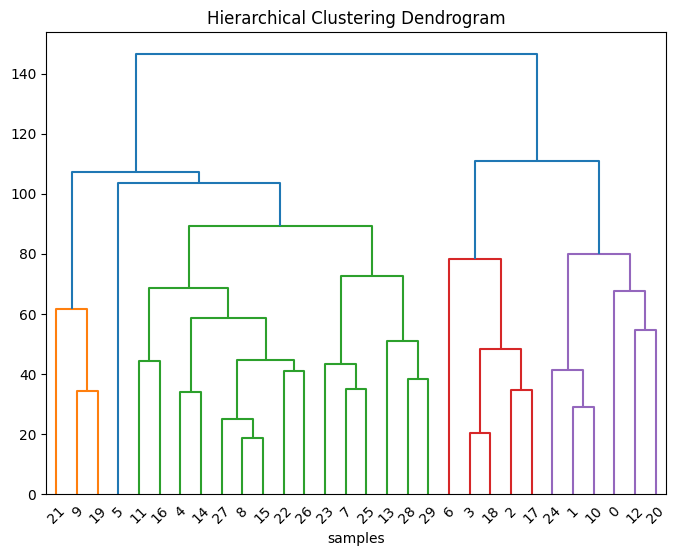

In [3]:
plt.figure(figsize=(8, 6))
Dendrogram.plot_dendrogram(model.model_)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plt.xlabel("samples")
plt.show()

In [4]:
model = IntervalFuzzyCMeans(n_clusters=4, max_iter=200,adaptive_weights=True)

model.fit(random_data.get_intervals())

model.get_membership()

array([[0.25145351, 0.25189051, 0.30793302, 0.18872297],
       [0.40419664, 0.40653689, 0.14088786, 0.04837861],
       [0.09619466, 0.0962969 , 0.07240519, 0.73510326],
       [0.099755  , 0.0999053 , 0.07011277, 0.73022692],
       [0.33793269, 0.33690822, 0.26216532, 0.06299377],
       [0.20501255, 0.20511916, 0.23476394, 0.35510435],
       [0.15204165, 0.15211534, 0.12726591, 0.5685771 ],
       [0.16259753, 0.16275804, 0.22225313, 0.45239131],
       [0.20504406, 0.2052753 , 0.5423657 , 0.04731493],
       [0.22402291, 0.2242013 , 0.41220222, 0.13957357],
       [0.42613359, 0.42638293, 0.10233394, 0.04514954],
       [0.34265283, 0.34231002, 0.22638541, 0.08865174],
       [0.28991161, 0.2902754 , 0.24351633, 0.17629665],
       [0.29986063, 0.29950762, 0.2863457 , 0.11428605],
       [0.36123805, 0.36041432, 0.20154284, 0.07680479],
       [0.1645548 , 0.16482529, 0.636497  , 0.03412291],
       [0.26821003, 0.26848039, 0.36777464, 0.09553493],
       [0.09207159, 0.09217847,

In [5]:
model.get_crisp_assignments()

print(silhouette_score(random_data.get_intervals(),model.get_crisp_assignments(),metric='euclidean'))

0.12548313145804577


In [6]:
n_dims = random_data.get_intervals().shape[1]

som = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som.pca_weights_init(random_data.get_intervals())

In [7]:
som.train_incremental(random_data.get_intervals(), verbose= False)

assignments = som.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)


Neuron (0, 0) has these sample indices => [0, 12, 20]
Neuron (0, 1) has these sample indices => [1, 4, 8, 9, 10, 11, 14, 15, 16, 19, 22, 24, 26, 27, 28, 29]
Neuron (1, 0) has these sample indices => [2, 3, 6, 7, 17, 18, 21, 23]
Neuron (1, 1) has these sample indices => [5, 13, 25]


In [8]:
som_2 = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som_2.pca_weights_init(random_data.get_intervals())

In [9]:
som_2.train_batch(random_data.get_intervals(), verbose= False)

assignments = som_2.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)

Neuron (1, 0) has these sample indices => [0, 2, 3, 6, 12, 17, 20, 23, 29]
Neuron (0, 0) has these sample indices => [1, 10, 11, 14, 24, 28]
Neuron (0, 1) has these sample indices => [4, 5, 8, 9, 15, 16, 19, 22, 26, 27]
Neuron (1, 1) has these sample indices => [7, 13, 18, 21, 25]
